In [16]:
!pip install opencv-python scikit-learn tqdm

import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [21]:
import zipfile

dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', dataset_url)

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')

print("Folders in train:", os.listdir(train_dir))


Folders in train: ['cats', 'dogs']


In [18]:
CATEGORIES = ["cats", "dogs"]
IMG_SIZE = 64
data = []
labels = []

for category in CATEGORIES:
    folder = os.path.join(train_dir, category)
    label = CATEGORIES.index(category)
    for img in tqdm(os.listdir(folder), desc=f"Processing {category}"):
        try:
            img_array = cv2.imread(os.path.join(folder, img), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array.flatten())  # Flatten to 1D
            labels.append(label)
        except:
            pass

data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Processing dogs: 100%|██████████| 1000/1000 [00:00<00:00, 1107.97it/s]

Data shape: (2000, 4096)
Labels shape: (2000,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1600
Testing samples: 400


In [20]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("Model training complete ✅")

Model training complete ✅


In [22]:
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.49      0.48       199
           1       0.47      0.46      0.47       201

    accuracy                           0.47       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.47      0.47      0.47       400


Confusion Matrix:
 [[ 97 102]
 [109  92]]


In [23]:
test_img_path = f"{train_dir}/cats/cat.0.jpg"

img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).flatten().reshape(1, -1)

prediction = model.predict(img)
print("Prediction:", CATEGORIES[prediction[0]])

Prediction: cats


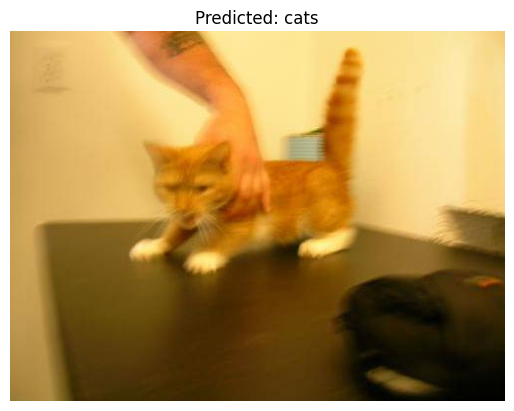

In [24]:
plt.imshow(cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {CATEGORIES[prediction[0]]}")
plt.axis('off')
plt.show()